<a href="https://colab.research.google.com/github/Riti04/federated_learning/blob/main/Federated_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# **Dataset**

In [2]:

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.columns = df.columns.str.strip()
df.head()

#striping is done to remove whitespaces, leading and trailing
#data cleaning method
#prevents error


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# **Federated learning**

In [3]:
# Simulate 3 clients based on quantiles of 'Age'
df["AgeGroup"] = pd.qcut(df["Age"], q=3, labels=[0, 1, 2])

# In real federated learning, data stays local to each client.

# We simulate that by splitting the dataset by age groups.

clients = []
for group in df["AgeGroup"].unique():
    client_data = df[df["AgeGroup"] == group].drop(columns=["AgeGroup"])
    clients.append(client_data.reset_index(drop=True))

print(f" Created {len(clients)} clients.")

# Mimics real-world privacy settings.
# Allows training without centralizing patient data.

 Created 3 clients.


# **Supervised** **Learning**

In [4]:
def train_supervised_on_client(client_df, client_id):
    X = client_df.drop(columns=["Diabetes_binary"])
    y = client_df["Diabetes_binary"]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n Supervised Learning - Client {client_id}")
    print(classification_report(y_test, y_pred))

# Train on each simulated client
for i, client in enumerate(clients):
    train_supervised_on_client(client, i)

    # enumerate  is used to give both data and index



 Supervised Learning - Client 0
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     15943
         1.0       0.50      0.22      0.30      3311

    accuracy                           0.83     19254
   macro avg       0.68      0.59      0.60     19254
weighted avg       0.79      0.83      0.80     19254


 Supervised Learning - Client 1
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     18699
         1.0       0.51      0.12      0.20      1408

    accuracy                           0.93     20107
   macro avg       0.72      0.56      0.58     20107
weighted avg       0.91      0.93      0.91     20107


 Supervised Learning - Client 2
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87      9025
         1.0       0.43      0.14      0.22      2351

    accuracy                           0.78     11376
   macro avg       0.62      

# **Unsupervised** **learning**

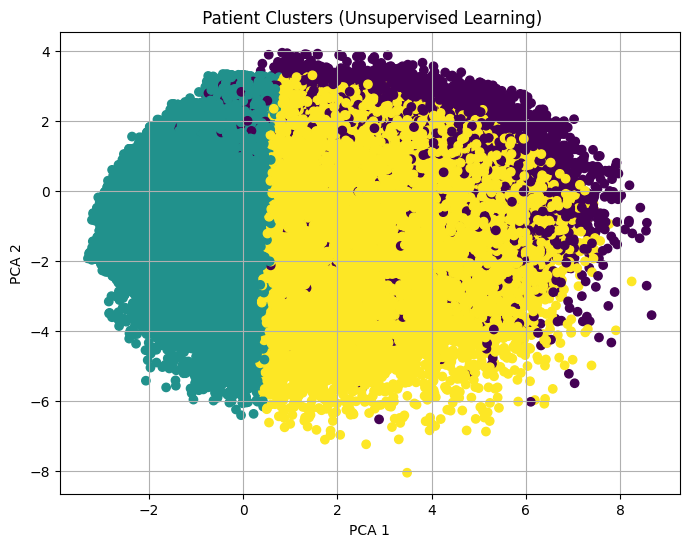

In [5]:
# Combine all clients' data
full_df = pd.concat(clients)
X = full_df.drop(columns=["Diabetes_binary"])

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap='viridis')
plt.title(" Patient Clusters (Unsupervised Learning)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


# **Simulating** **federated** **learning**

In [6]:
def simulate_federated_training(clients):
    weights = []
    for i, client in enumerate(clients):
        X = client.drop(columns=["Diabetes_binary"])
        y = client["Diabetes_binary"]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        model = LogisticRegression(max_iter=1000)
        model.fit(X_scaled, y)

        weights.append(model.coef_)

    # Average weights across clients
    avg_weights = np.mean(weights, axis=0)
    print("\n Federated Averaged Weights (Logistic Regression):")
    print(avg_weights)

simulate_federated_training(clients)


 Federated Averaged Weights (Logistic Regression):
[[ 3.37925353e-01  2.70758285e-01  2.11992358e-01  3.77781490e-01
  -2.37294782e-02  2.92379161e-02  7.53154946e-02 -2.33647899e-02
  -1.66164957e-02 -7.06359942e-03 -1.68217470e-01  1.49288820e-02
  -2.24317293e-04  5.83913710e-01 -4.17160408e-02 -6.58458383e-02
   4.22149136e-02  1.11086047e-01  1.57789603e-01 -3.72066225e-02
  -1.21319167e-01]]
